In [1]:
!nvidia-smi

Sat Oct 17 12:51:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/swapniel99/ezio.git

Cloning into 'ezio'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 437 (delta 25), reused 56 (delta 12), pack-reused 357
Receiving objects: 100% (437/437), 10.45 MiB | 25.42 MiB/s, done.
Resolving deltas: 100% (170/170), done.


In [3]:
%cd ezio

/content/ezio


In [7]:
import torch
import torch.optim as optim
from tqdm import tqdm
import numpy as np

!pip install torchsummary
from torchsummary import summary

from ezio.data import dataset 
from ezio.data.data_transforms.session_11 import transformations
from ezio.runner import engine
from ezio.utils import loss, lr_finder
from ezio.utils.misclassified_images import misclassified_images
from ezio.data.datasets import tinyImageNet

In [8]:
!pip install -U albumentations

     |████████████████████████████████| 122kB 4.3MB/s 
     |████████████████████████████████| 952kB 6.1MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65165 sha256=7cd48b04a7a5af7f3f65ba5763e136e401b6479d570f06ed4730f70e3f645db4
  Stored in directory: /root/.cache/pip/wheels/c7/f4/89/56d1bee5c421c36c1a951eeb4adcc32fbb82f5344c086efa14
Successfully built albumentations
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [9]:
train_transforms = transformations.perform_transformations(train=True, is_numpy=True)
test_transforms = transformations.perform_transformations(train=False, is_numpy=True)

In [10]:
train_set , test_set, classes = tinyImageNet.tinyImageNetDataSet(train_split = 70, test_transforms = test_transforms,train_transforms = train_transforms)

In [11]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [12]:
train_loader, test_loader = dataset.create_loaders(train_set, train_set, train_batch_size= 256, valid_batch_size= 256, num_workers=4)

In [13]:
from ezio.model.session_12.model import ResNet18
model = ResNet18(num_classes = 200).to(device)

In [14]:
summary(model, input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [15]:
loss_function = loss.cross_entropy_loss()

In [16]:
optimizer = optim.SGD(model.parameters(), lr=0.045, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=2, verbose=True, factor=0.5)

In [17]:
train_acc, train_losses, test_acc, test_losses = engine.fit(model, train_loader, test_loader, loss_function, device, optimizer, 50)

  0%|          | 0/301 [00:00<?, ?it/s]

EPOCH: 1


Loss=4.634349822998047 Batch_id=300 Accuracy=4.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0181, Accuracy: 4925/77000 (6.40%)

EPOCH: 2


Loss=4.198113918304443 Batch_id=300 Accuracy=9.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 7087/77000 (9.20%)

EPOCH: 3


Loss=4.115222930908203 Batch_id=300 Accuracy=12.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 9395/77000 (12.20%)

EPOCH: 4


Loss=3.731496810913086 Batch_id=300 Accuracy=15.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0152, Accuracy: 12004/77000 (15.59%)

EPOCH: 5


Loss=3.727292776107788 Batch_id=300 Accuracy=18.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0144, Accuracy: 14357/77000 (18.65%)

EPOCH: 6


Loss=3.397216558456421 Batch_id=300 Accuracy=20.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0137, Accuracy: 16638/77000 (21.61%)

EPOCH: 7


Loss=3.4438469409942627 Batch_id=300 Accuracy=22.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0134, Accuracy: 17654/77000 (22.93%)

EPOCH: 8


Loss=3.21006441116333 Batch_id=300 Accuracy=24.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.38it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0134, Accuracy: 18446/77000 (23.96%)

EPOCH: 9


Loss=3.416682481765747 Batch_id=300 Accuracy=25.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.36it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0131, Accuracy: 18963/77000 (24.63%)

EPOCH: 10


Loss=3.2736172676086426 Batch_id=300 Accuracy=26.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.37it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0126, Accuracy: 20533/77000 (26.67%)

EPOCH: 11


Loss=2.9435412883758545 Batch_id=300 Accuracy=28.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.37it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0124, Accuracy: 21358/77000 (27.74%)

EPOCH: 12


Loss=3.102433204650879 Batch_id=300 Accuracy=29.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.37it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 23236/77000 (30.18%)

EPOCH: 13


Loss=3.0127289295196533 Batch_id=300 Accuracy=30.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.38it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0119, Accuracy: 23137/77000 (30.05%)

EPOCH: 14


Loss=3.109821081161499 Batch_id=300 Accuracy=31.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 25298/77000 (32.85%)

EPOCH: 15


Loss=2.8613176345825195 Batch_id=300 Accuracy=32.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0113, Accuracy: 25449/77000 (33.05%)

EPOCH: 16


Loss=2.8132901191711426 Batch_id=300 Accuracy=33.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.41it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 26579/77000 (34.52%)

EPOCH: 17


Loss=2.6204030513763428 Batch_id=300 Accuracy=34.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.41it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 26752/77000 (34.74%)

EPOCH: 18


Loss=2.7208199501037598 Batch_id=300 Accuracy=35.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 27685/77000 (35.95%)

EPOCH: 19


Loss=2.8741400241851807 Batch_id=300 Accuracy=36.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 27977/77000 (36.33%)

EPOCH: 20


Loss=2.6527419090270996 Batch_id=300 Accuracy=37.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.41it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 29444/77000 (38.24%)

EPOCH: 21


Loss=2.6346020698547363 Batch_id=300 Accuracy=38.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 29757/77000 (38.65%)

EPOCH: 22


Loss=2.6377243995666504 Batch_id=300 Accuracy=39.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0101, Accuracy: 29688/77000 (38.56%)

EPOCH: 23


Loss=2.6441004276275635 Batch_id=300 Accuracy=39.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0098, Accuracy: 30724/77000 (39.90%)

EPOCH: 24


Loss=2.6573498249053955 Batch_id=300 Accuracy=40.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 32042/77000 (41.61%)

EPOCH: 25


Loss=2.6034810543060303 Batch_id=300 Accuracy=40.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0094, Accuracy: 32420/77000 (42.10%)

EPOCH: 26


Loss=2.412377119064331 Batch_id=300 Accuracy=41.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.41it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0093, Accuracy: 32591/77000 (42.33%)

EPOCH: 27


Loss=2.2562904357910156 Batch_id=300 Accuracy=42.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.38it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0092, Accuracy: 33458/77000 (43.45%)

EPOCH: 28


Loss=2.5649142265319824 Batch_id=300 Accuracy=43.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0089, Accuracy: 34600/77000 (44.94%)

EPOCH: 29


Loss=2.4434986114501953 Batch_id=300 Accuracy=44.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:41<00:00,  7.33it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 35008/77000 (45.46%)

EPOCH: 30


Loss=2.2495670318603516 Batch_id=300 Accuracy=44.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0087, Accuracy: 35297/77000 (45.84%)

EPOCH: 31


Loss=2.3163886070251465 Batch_id=300 Accuracy=45.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 35965/77000 (46.71%)

EPOCH: 32


Loss=2.2833609580993652 Batch_id=300 Accuracy=46.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.41it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0084, Accuracy: 36263/77000 (47.09%)

EPOCH: 33


Loss=2.2696752548217773 Batch_id=300 Accuracy=46.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 36581/77000 (47.51%)

EPOCH: 34


Loss=2.041971445083618 Batch_id=300 Accuracy=47.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 37228/77000 (48.35%)

EPOCH: 35


Loss=2.254700183868408 Batch_id=300 Accuracy=47.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0081, Accuracy: 37380/77000 (48.55%)

EPOCH: 36


Loss=1.9135313034057617 Batch_id=300 Accuracy=48.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 38419/77000 (49.89%)

EPOCH: 37


Loss=2.020721673965454 Batch_id=300 Accuracy=49.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.41it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 38550/77000 (50.06%)

EPOCH: 38


Loss=2.2021727561950684 Batch_id=300 Accuracy=49.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 39307/77000 (51.05%)

EPOCH: 39


Loss=2.2098937034606934 Batch_id=300 Accuracy=50.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 39913/77000 (51.84%)

EPOCH: 40


Loss=2.0173420906066895 Batch_id=300 Accuracy=51.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0074, Accuracy: 40280/77000 (52.31%)

EPOCH: 41


Loss=1.9623719453811646 Batch_id=300 Accuracy=51.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 40881/77000 (53.09%)

EPOCH: 42


Loss=2.0136115550994873 Batch_id=300 Accuracy=51.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.38it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 40986/77000 (53.23%)

EPOCH: 43


Loss=2.035189628601074 Batch_id=300 Accuracy=52.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.40it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 41656/77000 (54.10%)

EPOCH: 44


Loss=2.067873001098633 Batch_id=300 Accuracy=53.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0073, Accuracy: 40843/77000 (53.04%)

EPOCH: 45


Loss=1.5666886568069458 Batch_id=300 Accuracy=53.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.38it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0069, Accuracy: 42570/77000 (55.29%)

EPOCH: 46


Loss=2.0024662017822266 Batch_id=300 Accuracy=54.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.38it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 42901/77000 (55.72%)

EPOCH: 47


Loss=1.8841400146484375 Batch_id=300 Accuracy=54.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 43754/77000 (56.82%)

EPOCH: 48


Loss=2.0026772022247314 Batch_id=300 Accuracy=55.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.41it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 43475/77000 (56.46%)

EPOCH: 49


Loss=1.9996551275253296 Batch_id=300 Accuracy=55.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.38it/s]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 44727/77000 (58.09%)

EPOCH: 50


Loss=1.96555757522583 Batch_id=300 Accuracy=56.00 Learning Rate=0.045: 100%|██████████| 301/301 [00:40<00:00,  7.39it/s]



Test set: Average loss: 0.0065, Accuracy: 44232/77000 (57.44%)



[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9156bec748>


Text(0.5, 1.0, 'Test Losses')

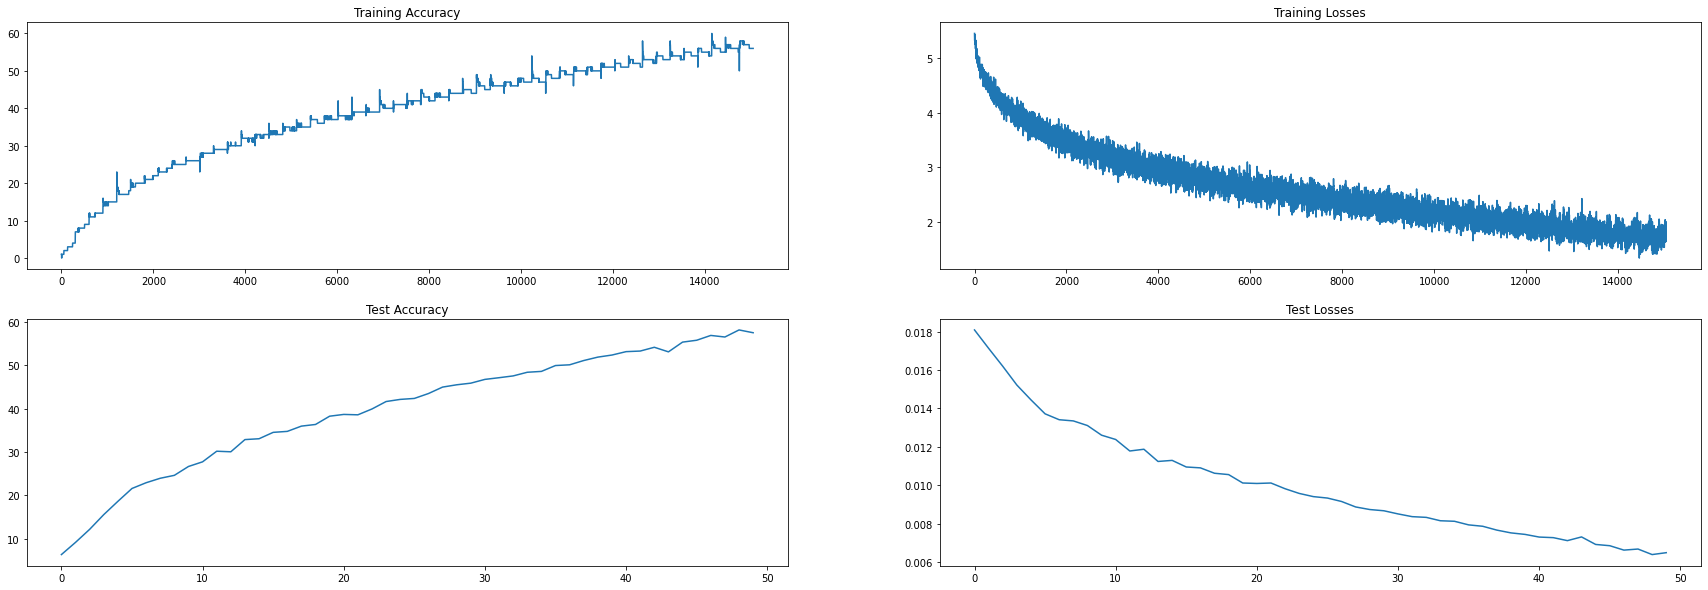

In [18]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(30,10))
print(axs)
axs[0][0].plot(train_acc, label = "train_acc")
axs[0][1].plot(train_losses, label = "train_losses")
axs[1][0].plot(test_acc, label = "test_acc")
axs[1][1].plot(test_losses, label = "test_losses")
# axs[0].legend()
axs[0][0].set_title("Training Accuracy")
axs[0][1].set_title("Training Losses")
axs[1][0].set_title("Test Accuracy")
axs[1][1].set_title("Test Losses")